## Visualizing of EcoFOCI Glider Locations from Science Data Set - single profiles


In [1]:
%matplotlib inline

In [3]:
import os

import xarray as xa
import numpy as np

import cmocean
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


/Users/bell/anaconda2/envs/py36/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


Using profile 262 which was corrected for the 0.5 threshold but not any other thresholds

In [17]:
xa1p5d = xa.open_mfdataset('/Users/bell/Programs/Python/EcoFOCI_OculusGlider/data/1p5_dtdz/'+'p4010262_d.nc',autoclose=True)
xa1p5u = xa.open_mfdataset('/Users/bell/Programs/Python/EcoFOCI_OculusGlider/data/1p5_dtdz/'+'p4010262_u.nc',autoclose=True)
xa1p0d = xa.open_mfdataset('/Users/bell/Programs/Python/EcoFOCI_OculusGlider/data/1p0_dtdz/'+'p4010262_d.nc',autoclose=True)
xa1p0u = xa.open_mfdataset('/Users/bell/Programs/Python/EcoFOCI_OculusGlider/data/1p0_dtdz/'+'p4010262_u.nc',autoclose=True)
xa0p5 = xa.open_mfdataset('/Users/bell/Programs/Python/EcoFOCI_OculusGlider/data/0p5_dtdz/'+'p4010262_m.nc',autoclose=True)

### Plot the Upcast/Downcast and Corrected Merged Profile

*** Since the 1.5 deg/m and 1.0 deg/m thresholds did not result in a merged profile, only plot 1.5 ***

(66.1, -2.1)

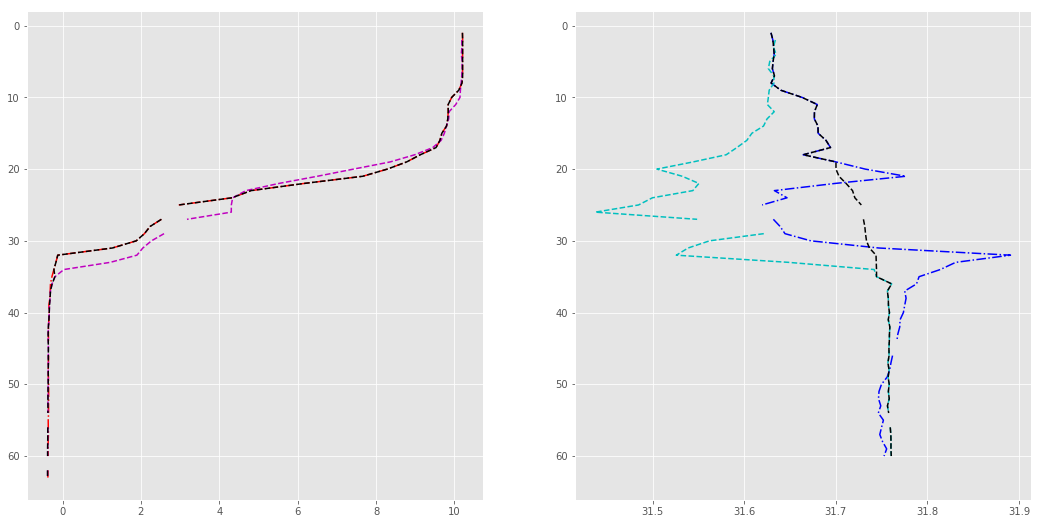

In [28]:
fig = plt.figure(3, figsize=(18,9), facecolor='w', edgecolor='w')
ax1 = fig.add_subplot(121)
plt.plot(xa1p5d.Temperature,xa1p5d.Pressure,'r-.')
plt.plot(xa1p5u.Temperature,xa1p5d.Pressure,'m--')
plt.plot(xa0p5.Temperature,xa0p5.Pressure,'k--')
ax1.invert_yaxis()
yr=ax1.get_ylim()
ax1 = fig.add_subplot(122)
plt.plot(xa1p5d.Salinity,xa1p5d.Pressure,'b-.')
plt.plot(xa1p5u.Salinity,xa1p5d.Pressure,'c--')
plt.plot(xa0p5.Salinity,xa0p5.Pressure,'k--')
plt.ylim(yr)


** in the above plots, the black lines are the "merged" or corrected data set if the sharpness threshold was met, The dark blue/red are the downcast data and the light blue/red are the upcast data for the same profile - bin averaged to 1m

/Users/bell/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


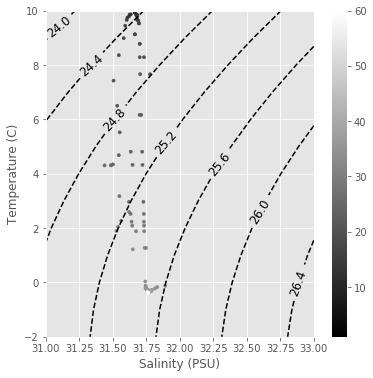

In [29]:
import seawater as sw

def plot_salvtemp(salt, temp, press, srange=[31,33], trange=[-2,10], ptitle="",labels=True): 
    plt.style.use('ggplot')
    
    # Figure out boudaries (mins and maxs)
    smin = srange[0]
    smax = srange[1]
    tmin = trange[0]
    tmax = trange[1]

    # Calculate how many gridcells we need in the x and y dimensions
    xdim = int(round((smax-smin)/0.1+1,0))
    ydim = int(round((tmax-tmin)+1,0))
    
    #print 'ydim: ' + str(ydim) + ' xdim: ' + str(xdim) + ' \n'
    if (xdim > 10000) or (ydim > 10000): 
        print('To many dimensions for grid in file. Likely  missing data \n')
        return
 
    # Create empty grid of zeros
    dens = np.zeros((ydim,xdim))
 
    # Create temp and salt vectors of appropiate dimensions
    ti = np.linspace(0,ydim-1,ydim)+tmin
    si = np.linspace(0,xdim-1,xdim)*0.1+smin
 
    # Loop to fill in grid with densities
    for j in range(0,int(ydim)):
        for i in range(0, int(xdim)):
            dens[j,i]=sw.dens0(si[i],ti[j])
 
    # Substract 1000 to convert to sigma-t
    dens = dens - 1000
 
    # Plot data ***********************************************
    
    ax1 = fig.add_subplot(111)
    if labels:
        CS = plt.contour(si,ti,dens, linestyles='dashed', colors='k')

        
    if labels:
        plt.clabel(CS, fontsize=12, inline=1, fmt='%1.1f') # Label every second level
 
    ts = ax1.scatter(salt,temp, c=press, cmap='gray', s=10)
    plt.ylim(tmin,tmax)
    plt.xlim(smin,smax)
    if labels:
        plt.colorbar(ts )
 
        ax1.set_xlabel('Salinity (PSU)')
        ax1.set_ylabel('Temperature (C)')

    
        t = fig.suptitle(ptitle, fontsize=12, fontweight='bold')
        t.set_y(1.08)
    return fig  

fig = plt.figure(figsize=(6, 6))
fig = plot_salvtemp(xa1p5d.Salinity,xa1p5d.Temperature,xa1p5d.Pressure)
fig = plot_salvtemp(xa1p5u.Salinity,xa1p5u.Temperature,xa1p5u.Pressure,labels=False)
fig = plot_salvtemp(xa0p5.Salinity,xa0p5.Temperature,xa0p5.Pressure,labels=False)


*** Using profile 1800 which was corrected for the 0.5 threshold but not any other thresholds ***

In [7]:
xa1p5d = xa.open_mfdataset('/Users/bell/Programs/Python/EcoFOCI_OculusGlider/data/1p5_dtdz/'+'p4011800_d.nc',autoclose=True)
xa1p5u = xa.open_mfdataset('/Users/bell/Programs/Python/EcoFOCI_OculusGlider/data/1p5_dtdz/'+'p4011800_u.nc',autoclose=True)
xa1p0d = xa.open_mfdataset('/Users/bell/Programs/Python/EcoFOCI_OculusGlider/data/1p0_dtdz/'+'p4011800_d.nc',autoclose=True)
xa1p0u = xa.open_mfdataset('/Users/bell/Programs/Python/EcoFOCI_OculusGlider/data/1p0_dtdz/'+'p4011800_u.nc',autoclose=True)
xa0p5 = xa.open_mfdataset('/Users/bell/Programs/Python/EcoFOCI_OculusGlider/data/0p5_dtdz/'+'p4011800_m.nc',autoclose=True)

(67.15, -2.1500000000000004)

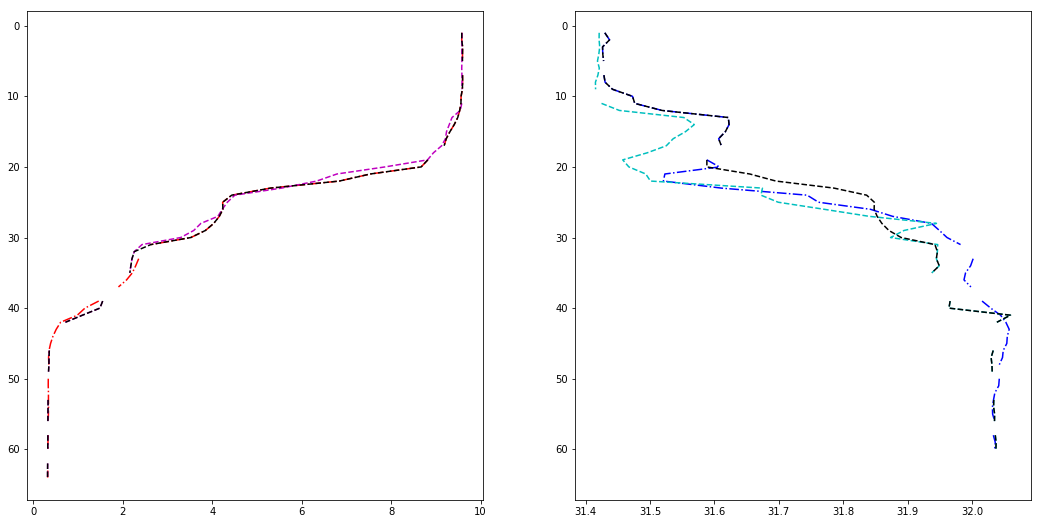

In [8]:
fig = plt.figure(3, figsize=(18,9), facecolor='w', edgecolor='w')
ax1 = fig.add_subplot(121)
plt.plot(xa1p5d.Temperature,xa1p5d.Pressure,'r-.')
plt.plot(xa1p5u.Temperature,xa1p5d.Pressure,'m--')
plt.plot(xa0p5.Temperature,xa0p5.Pressure,'k--')
ax1.invert_yaxis()
yr=ax1.get_ylim()
ax1 = fig.add_subplot(122)
plt.plot(xa1p5d.Salinity,xa1p5d.Pressure,'b-.')
plt.plot(xa1p5u.Salinity,xa1p5d.Pressure,'c--')
plt.plot(xa0p5.Salinity,xa0p5.Pressure,'k--')
plt.ylim(yr)


/Users/bell/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


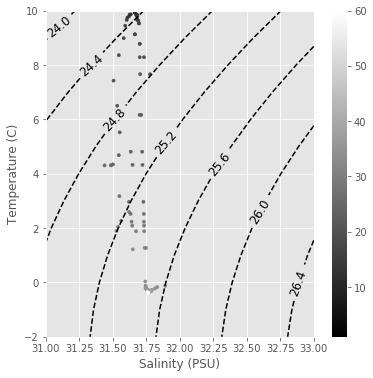

In [27]:
import seawater as sw

def plot_salvtemp(salt, temp, press, srange=[31,33], trange=[-2,10], ptitle="",labels=True): 
    plt.style.use('ggplot')
    
    # Figure out boudaries (mins and maxs)
    smin = srange[0]
    smax = srange[1]
    tmin = trange[0]
    tmax = trange[1]

    # Calculate how many gridcells we need in the x and y dimensions
    xdim = int(round((smax-smin)/0.1+1,0))
    ydim = int(round((tmax-tmin)+1,0))
    
    #print 'ydim: ' + str(ydim) + ' xdim: ' + str(xdim) + ' \n'
    if (xdim > 10000) or (ydim > 10000): 
        print('To many dimensions for grid in file. Likely  missing data \n')
        return
 
    # Create empty grid of zeros
    dens = np.zeros((ydim,xdim))
 
    # Create temp and salt vectors of appropiate dimensions
    ti = np.linspace(0,ydim-1,ydim)+tmin
    si = np.linspace(0,xdim-1,xdim)*0.1+smin
 
    # Loop to fill in grid with densities
    for j in range(0,int(ydim)):
        for i in range(0, int(xdim)):
            dens[j,i]=sw.dens0(si[i],ti[j])
 
    # Substract 1000 to convert to sigma-t
    dens = dens - 1000
 
    # Plot data ***********************************************
    
    ax1 = fig.add_subplot(111)
    if labels:
        CS = plt.contour(si,ti,dens, linestyles='dashed', colors='k')

        
    if labels:
        plt.clabel(CS, fontsize=12, inline=1, fmt='%1.1f') # Label every second level
 
    ts = ax1.scatter(salt,temp, c=press, cmap='gray', s=10)
    plt.ylim(tmin,tmax)
    plt.xlim(smin,smax)
    if labels:
        plt.colorbar(ts )
 
        ax1.set_xlabel('Salinity (PSU)')
        ax1.set_ylabel('Temperature (C)')

    
        t = fig.suptitle(ptitle, fontsize=12, fontweight='bold')
        t.set_y(1.08)
    return fig  

fig = plt.figure(figsize=(6, 6))
fig = plot_salvtemp(xa1p5d.Salinity,xa1p5d.Temperature,xa1p5d.Pressure)
fig = plot_salvtemp(xa1p5u.Salinity,xa1p5u.Temperature,xa1p5u.Pressure,labels=False)
fig = plot_salvtemp(xa0p5.Salinity,xa0p5.Temperature,xa0p5.Pressure,labels=False)
